In [8]:
#%load_ext autoreload
#%autoreload 2

In [13]:
import helper_functions as hf

In [14]:
# Load images
cars_path, notcars_path = hf.load_images()
print(len(cars_path), len(notcars_path))

8792 8968


In [15]:
# Define feature parameters
colorspace='YCrCb' # RGB, HSV, LUV, HLS, YUV, YCrCb
orient=9
pix_per_cell=8
cell_per_block=2
hog_channel='ALL'
spatial_size=(16, 16)
hist_bins=16
hist_range=(0, 256)

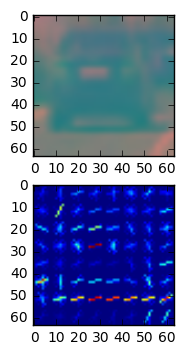

In [24]:
# Try out getting HOG features
import cv2
img = mpimg.imread(cars_path[0])
img = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)
features, ret_img = hf.get_hog_features(img[:,:,0], orient, pix_per_cell, cell_per_block,
                     vis=True, feature_vec=True)
fig = plt.figure()
plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.imshow(ret_img)

(48,)


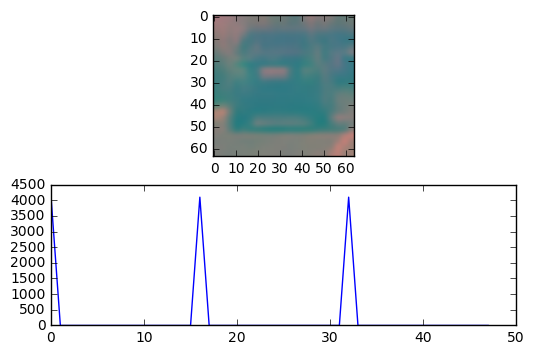

In [25]:
# Get example color histogram
hist_features = hf.color_hist(img, nbins=hist_bins, bins_range=hist_range)
print(np.shape(hist_features))
fig = plt.figure()
plt.subplot(211)
plt.imshow(img)
plt.subplot(212)
plt.plot(hist_features)


In [12]:
# Do feature extraction for all images
car_features = hf.extract_features(cars_path, cspace=colorspace, orient=orient,pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,                    hog_channel=hog_channel,spatial_size=spatial_size, hist_bins=hist_bins, hist_range=hist_range)
    
notcar_features = hf.extract_features(notcars_path, cspace=colorspace, orient=orient,                       pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
hog_channel=hog_channel,spatial_size=spatial_size, hist_bins=hist_bins, hist_range=hist_range)

In [13]:
# Print info about features
print(len(car_features[0]))

6108


In [14]:
# Train model
svc, X_scaler = hf.train_test_svm(car_features, notcar_features)

Feature vector length: 6108
16.02 Seconds to train SVC...
Test Accuracy of SVC =  0.9876


In [15]:
# Write out training data so we don't have to recalculate
import pickle 
pickle.dump(svc, open( "svc.p", "wb" ) )
pickle.dump(X_scaler, open( "X_scaler.p", "wb" ) )

In [3]:
# Read in training data
import pickle
svc = pickle.load(open("svc.p", "rb"))
X_scaler = pickle.load(open("X_scaler.p", "rb"))

In [4]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage.measurements import label
%matplotlib inline
import glob
import os

In [5]:
# Process test images
images = glob.glob(os.path.join('.', 'test_images', '*.jpg'))
for i, img_path in enumerate(images):
    img = mpimg.imread(img_path)
    draw_img, bbox_list = hf.find_cars(img, svc=svc, X_scaler=X_scaler, orient=orient,
                                   pix_per_cell=pix_per_cell, cell_per_block=cell_per_block,
                                   spatial_size=spatial_size, hist_bins=hist_bins, scale=1.5)
    mpimg.imsave('./output_images/out_'+str(i), draw_img)

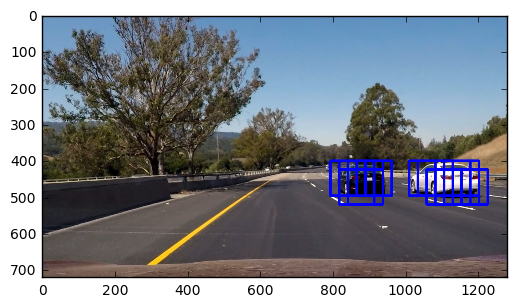

In [6]:
plt.imshow(draw_img)

In [7]:
img = mpimg.imread(images[0])

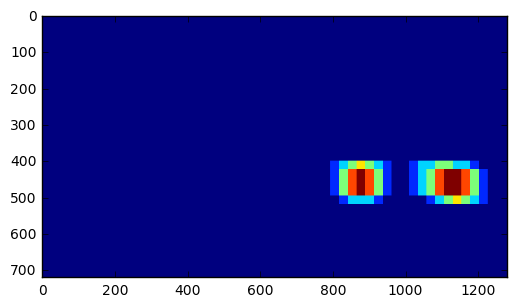

In [8]:
# Add heat map
heat = np.zeros_like(img[:,:,0]).astype(np.float)
heat = hf.add_heat(heat,bbox_list)
plt.imshow(heat)

In [9]:
# Apply threshold
heat = hf.apply_threshold(heat,1)

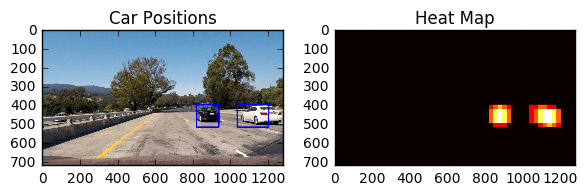

In [10]:
# Examine results

heatmap = np.clip(heat, 0, 255)
labels = label(heatmap)
draw_img = hf.draw_labeled_bboxes(np.copy(img), labels)

fig = plt.figure()
plt.subplot(121)
plt.imshow(draw_img)
plt.title('Car Positions')
plt.subplot(122)
plt.imshow(heatmap, cmap='hot')
plt.title('Heat Map')
fig.tight_layout()

In [11]:
hf.process_video('./test_video.mp4', file_out='test_out.mp4')

[MoviePy] >>>> Building video test_out.mp4
[MoviePy] Writing video test_out.mp4


 97%|█████████▋| 38/39 [00:11<00:00,  3.27it/s]


[MoviePy] Done.
[MoviePy] >>>> Video ready: test_out.mp4 



In [ ]:
hf.process_video('./project_video.mp4', file_out='project_out.mp4')